Problem3

<br><b>Introduction</b><br>

This task makes you work with Numpy Matrices (Multidimensional Data).This analysis dives into the body measurements of adult males and females sourced from the National Health and Nutrition Examination Survey (NHANES) dataset. The dataset includes crucial metrics like height, weight, waist circumference, hip circumference,arm length, leg length. The comprehensive exploration involves tasks such as reading and processing the data,finding BMI,finding aggregate functions, creating histograms,boxplots, generating scatterplot matrices, and computing correlation coefficients.

In [1]:
import numpy as np #Importing packages
import matplotlib.pyplot as plt
from scipy.stats import skew
import seaborn as sns
import pandas as pd
from scipy import stats
from matplotlib import cm

1. Lets download both csv files from the given source.

Successfully downloaded the two data files.

2. Lets read the files as numpy matrices using numpy,genfromtxt.

In [2]:
#All the headings and unwanted texts are removed
male = np.genfromtxt('nhanes_adult_male_bmx_2020.csv', delimiter=',',comments='#',skip_header=19) 
female = np.genfromtxt('nhanes_adult_female_bmx_2020.csv', delimiter=',',comments='#', skip_header=19)


Column name and all the comments are removed and imported so that it is easy to work upon

In [3]:
male.shape

(4081, 7)

In [4]:
female.shape

(4221, 7)

Dimension of both array is checked. It consist of 7 columns in both dataset.

3. Let add one more column which stores the body mass index of the participants. For which their weights and heights are given. <br><br>
Equation for calcuating BMI $$BMI = \frac{mass_{kg}}{height_{m}^2}$$

In [5]:
#The data given contains the weight(kg) and height(cm) so we can calculate bmi and add it to the array.

weight_male = male[:,0] #Weight in 0th column as mentioned
weight_female = female[:,0]

height_male = male[:,1]/100 #Height in 1th column. Converted to metre.
height_female = female[:,1]/100

Height and weight of both dataset is calculate.

In [6]:
#Substitute in the equation and add the column
bmi_male = weight_male/(height_male**2)
bmi_female = weight_female/(height_female**2)

#adding the BMI column
new_male = np.column_stack((male,bmi_male))
new_female = np.column_stack((female,bmi_female))

Successfully calculated the bmi and added it as a new column to both the datasets.

<br><br>4. Lets plot the BMI of both male and female on a histogram.

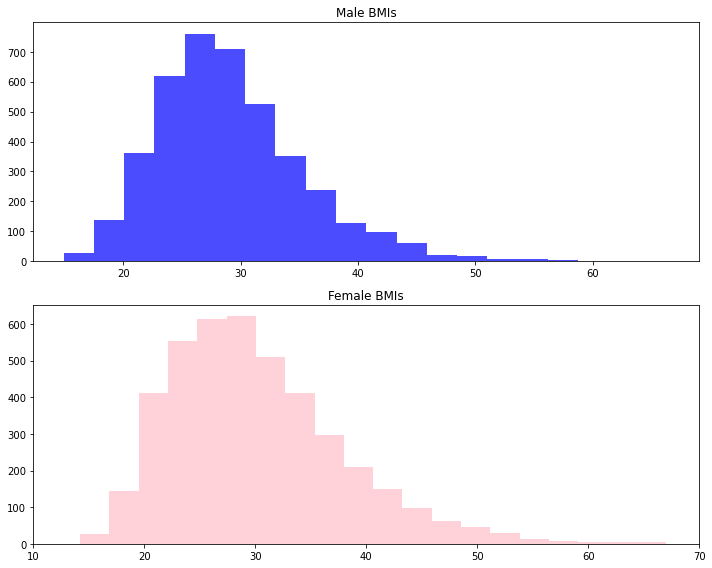

In [7]:
# Creating subplots
plt.figure(figsize=(10, 8))

# Male BMI Histogram (Top subplot)
plt.subplot(2, 1, 1)
plt.hist(bmi_male, bins=20, color='blue', alpha=0.7)
plt.title('Male BMIs')

# Female BMI Histogram (Bottom subplot)
plt.subplot(2, 1, 2)
plt.hist(bmi_female, bins=20, color='pink', alpha=0.7)
plt.title('Female BMIs')


# Set x-axis limits to be identical for both subplots
plt.xlim(10,70)

# Show the plot
plt.tight_layout()
plt.show()

Successfully plotted two histograms as subplots representing the BMIs of both male and females. Initialized xlimit for identical plotting.

<br>
5. We plotted two boxplots representing the two BMIs for easy comparision.

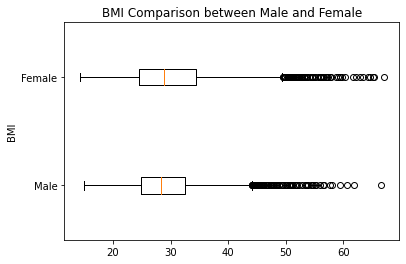

In [8]:
# Creating a list of vectors for boxplot
vec_li = [bmi_male, bmi_female]

# Creating a box-and-whisker plot
plt.boxplot(vec_li, labels=['Male', 'Female'],vert=False)
plt.title('BMI Comparison between Male and Female')
plt.ylabel('BMI')

# Displaying the plot
plt.show()

We made two boxplots together for comparing BMIs of male and female.

<br>
6. Let us calculate common aggregates of male and female BMIs.

In [9]:
# Computing each numerical aggregates given in the problem
#Inorder to print all these aggregate values we are storing the values in a dictionary

aggregates_male = {          #Dictionary to store aggregates of male participant
    'BMI mean': np.mean(bmi_male),
    'BMI median': np.median(bmi_male),
    'BMI min': np.min(bmi_male),
    'BMI max': np.max(bmi_male),
    'BMI std': np.std(bmi_male),
    'BMI IQR': np.percentile(bmi_male, 75) - np.percentile(bmi_male, 25),
    'BMI skew': skew(bmi_male)    #Skewness found using scipy
}

aggregates_female = {       #Dictionary to store aggregates of female participant
    'BMI mean': np.mean(bmi_female),
    'BMI median': np.median(bmi_female),
    'BMI min': np.min(bmi_female),
    'BMI max': np.max(bmi_female),
    'BMI std': np.std(bmi_female),
    'BMI IQR': np.percentile(bmi_female, 75) - np.percentile(bmi_female, 25),
    'BMI skew': skew(bmi_female) #Skewness found using scipy
}

# Display the results using dictionary and keys for the desired format.
print("##\t\tfemale\tmale")
for key in aggregates_male.keys():
    print(f"## {key}\t{aggregates_female[key]:.2f}\t{aggregates_male[key]:.2f}")

##		female	male
## BMI mean	30.10	29.14
## BMI median	28.89	28.27
## BMI min	14.20	14.91
## BMI max	67.04	66.50
## BMI std	7.76	6.31
## BMI IQR	10.01	7.73
## BMI skew	0.92	0.97


Different aggregate values has been found for bmi for both data. Skewness is found using scipy.

<br>
7. Lets compare the above three results.

<b>Skewness</b><br>
Male BMI has skewness of 0.97 and Female BMI has skewness of 0.92. And it is evident from the histogram and boxplot that there is a positive skewness that means a tail to the right. This means there is bmi values that are at extreme points. Maybe they are outliers or severe bmi values.
<br><br>
<b>Central Tendancy (Mean and Median)</b>
Median for both male and female are almost equal. Female bmi has slight higher mean value. We know when mean is higher than median there is a right skewed distribution, it is evident here. The median is also visible in the boxplot.
<br><br>
<b>Spread(Standard Deviation and IQR)</b>
Female bmi has higher standard deviation and IQR. It is also visible in the graph that the data is distributed higher in female bmi. In boxplot IQR range is higher.
<br><br>
<b>Outlier</b>
When looking into the boxplot and min and max values we can say there is chance for outliers.

<br>
8. Let's draw pairplot for male heights,weights,waist curcumference,hip circumference, and BMIs.

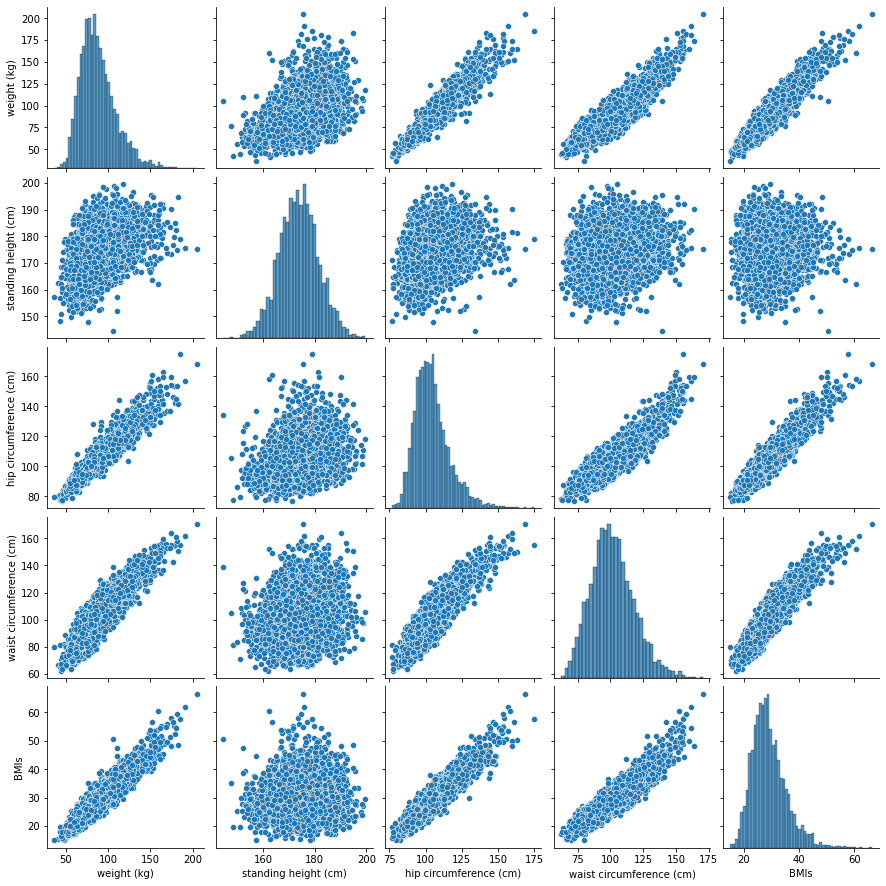

In [10]:
#Since our data is in numpy matrix we are creating temporary pandas dataframe to input the values.
sns.pairplot(data=pd.DataFrame(
    new_male[:,[0,1,5,6,7]],
    columns=[
        "weight (kg)", "standing height (cm)",
        "hip circumference (cm)", "waist circumference (cm)","BMIs"
    ]
))
plt.show()

Created pairplot between 5 different attributes of male participant. Can observe some are highly positively correlated.


<br>
9. Let's compute Pearson's and Spearman's correlation coefficients for the same variables and plot it on a heatmap.

In [12]:
# We need to create two heatmaps that too of pearson and spearman correlation
#Inroder to create heatmap we are creating new array with the only columns that we need.
male_reduced = new_male #new array created
male_reduced = np.delete(male_reduced, [2, 3, 4], 1) #Deleting unwanted columns
print(male_reduced.shape)
male_reduced[:5,:] #Checking

(4081, 5)


array([[ 98.8       , 182.3       , 108.2       , 120.4       ,
         29.72922633],
       [ 74.3       , 184.2       ,  94.5       ,  86.8       ,
         21.89825769],
       [103.7       , 185.3       , 107.8       , 109.6       ,
         30.20145858],
       [ 86.        , 167.8       , 106.4       , 108.3       ,
         30.54320016],
       [ 99.4       , 181.6       , 120.2       , 107.        ,
         30.1407945 ]])

New array created lets find the correlations and create heatmap

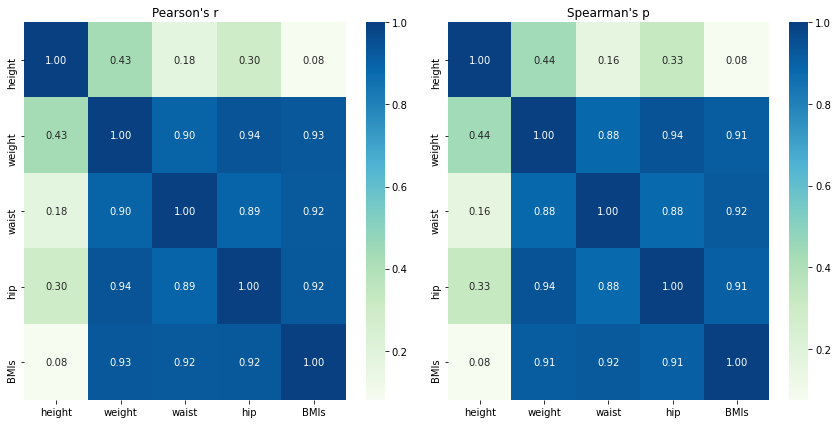

In [13]:
# Create subplots
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 6))

#Initializing the order in which the data to be displayed
order = [1,0,3,2,4]
cols = np.array(["weight","height",
        "hip", "waist","BMIs"]) #Giving the names
C = np.corrcoef(male_reduced.T) #Finding the Pearsons correlation

#First heatmap
sns.heatmap(                              
    C[np.ix_(order, order)],
    xticklabels=cols[order],
    yticklabels=cols[order],
    annot=True, fmt=".2f", cmap=cm.get_cmap("GnBu"),ax=axes[0]
)
axes[0].set_title("Pearson's r")
                         
SC,rho = stats.spearmanr(male_reduced.T,axis=1) #Finding Pearson's correlation using scipy.

#Second heatmap
sns.heatmap(
    SC[np.ix_(order, order)],
    xticklabels=cols[order],
    yticklabels=cols[order],
    annot=True, fmt=".2f", cmap=cm.get_cmap("GnBu"),ax=axes[1]
)
axes[1].set_title("Spearman's p")
                         
# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()                         

We have succefully created two heatmap with Pearson and Spearman correlation of the given attributes of the male data.

<br>
10. Lets compare the finding from the above two

In subtask 8, we created a scatterplot matrix (pairplot) for male heights, weights, waist circumferences, hip circumferences, and BMIs. The pairplot allowed us to visualize the relationships and distributions between these variables.
* Height and Weight: There appears to be a positive correlation between height and weight, as indicated by the upward trend in the scatterplot.
* Height and Waist Circumference: The scatterplot suggests a moderate positive correlation between height and waist circumference.
* Height and Hip Circumference: Similar to waist circumference, there seems to be a positive correlation between height and hip circumference.
* Only height is having lower correlation with rest of the variables. Hip and waist is highly correlated to weight.
<br><br><br>

In subtask 9, we computed Pearson’s and Spearman’s correlation coefficients for all pairs of variables and visualized them using heatmaps. Pearson's correlation measures linear relationships. The values range from -1 to 1. Spearman's correlation is a rank-based correlation that captures monotonic relationships (not necessarily linear). The same conclusion from scatterplot can be observed here. But spearman's correlation matrix is less sensitive to outliers so it can be used to deep dive<br>

* The scatterplot matrix and correlation heatmaps together provide a comprehensive view of the relationships among male body measurements.
* Positive correlations between height and weight, waist circumference, and hip circumference align with expectations, as taller individuals might generally have larger body measurements.
* The correlation between weight and BMI reinforces the understanding that BMI is influenced by weight and height